### 0. Initiliazation of variables

In [43]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all, var

### 1. Import modules

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
import sys, os, time, datetime

### 2. Define functions
#### Test functions
$f(x,y) = x^2 + y^2$  ... Sphere function  
$\nabla f(x, y) = [2x, 2y]^T  $  

---

$f(x,y) = (1.5 − x + xy)^2 + (2.25 − x + xy^2)^2 + (2.625 − x + xy^3)^2$ ... Beale function  
$\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(-1 + y) + 2(2.25 - x + xy^2)(-1 + y^2) + 2(2.625 - x + xy^3)(-1 + y^3)$  
$\frac{\partial f}{\partial y} = 2x(1.5 - x + xy) + 4xy(2.25 - x + xy^2) + 6xy^2(2.625 - x + xy^3)$

---

$f(x,y) = (x + 2y − 7)^2 + (2x + y − 5)^2$ ... Booth function  
$\frac{\partial f}{\partial x} = 2(x + 2y - 7) + 4(2x + y - 5)$  
$\frac{\partial f}{\partial y} = 4(x + 2y - 7) + 2(2x + y - 5)$

---

$f(x,y) = 0.26(x^2 + y^2)−0.48xy$ ... Matyas function  
$\frac{\partial f}{\partial x} = 0.52x - 0.48y$  
$\frac{\partial f}{\partial y} = 0.52y - 0.48x$

---

#### Target function  
$f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $ ... Rosenbrock function  
$\frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2)$  
$\frac{\partial f}{\partial y} = 200(y - x^2)$

In [45]:
# Test function 1 : Sphere function
func_sphere = lambda x : x[0]**2 + x[1]**2
Dfunc_sphere = lambda x : np.array([2*x[0], 
                                    2*x[1]]).reshape(-1, 1) # reshape(-1, 1) --> ?행 1열짜리 행렬로 바꿔줘. ?행이 될지는 니가 알아서 계산해서 처리해줘.라는 명령어

# Test function 2 : Beale Function
func_beale = lambda x : (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
Dfunc_beale = lambda x : np.array([2*(1.5 - x[0] + x[0]*x[1])*(-1 + x[1]) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(-1 + x[1]**2) + 2*(2.625 - x[0] + x[0]*x[1]**3)*(-1 + x[1]**3),
                                    2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*x[1]**2*(2.625 - x[0] + x[0]*x[1]**3)]).reshape(-1, 1)

# Test function 3 : Booth Function
func_booth = lambda x : (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
Dfunc_booth = lambda x : np.array([2*(x[0] + 2*x[1] - 7) + 4*(2*x[0] + x[1] - 5),
                                   4*(x[0] + 2*x[1] - 7) + 2*(2*x[0] + x[1] - 5)]).reshape(-1, 1)

# Test function 4 : Matyas Function
func_matyas = lambda x : 0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]
Dfunc_matyas = lambda x : np.array([0.52*x[0] - 0.48*x[1], 
                                    0.52*x[1] - 0.48*x[0]]).reshape(-1, 1)

# Target function
func_rosenbrock = lambda x : (1.0 - x[0])**2 + 100*(x[1] - x[0]**2)**2
Dfunc_rosenbrock = lambda x : np.array([-2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
                                        200*(x[1] - x[0]**2)]).reshape(-1, 1)

### 3. Plot functions

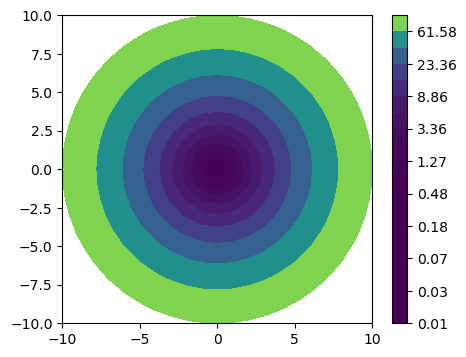

In [46]:
# Sphere function
step = 1
grid_sphere = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_sphere = func_sphere(grid_sphere)
fig_shpere, ax_shpere = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_shpere = ax_shpere.contourf(grid_sphere[0], grid_sphere[1], fv_sphere, levels=np.logspace(-2, 2, 20))
fig_shpere.colorbar(contour_shpere, ax=ax_shpere)

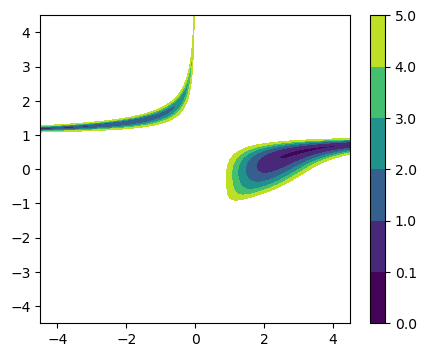

In [47]:
# Beale function
step = .01
grid_beale = np.meshgrid(np.arange(-4.5, 4.5+step, step), np.arange(-4.5, 4.5+step, step))
fv_beale = func_beale(grid_beale)
fig_beale, ax_beale = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_beale = ax_beale.contourf(grid_beale[0], grid_beale[1], fv_beale, levels=[0, 0.1, 1, 2, 3, 4, 5])
fig_beale.colorbar(contour_beale, ax=ax_beale)

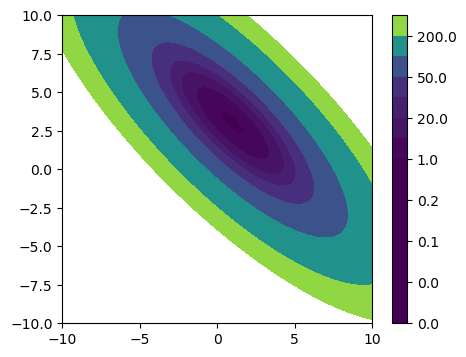

In [48]:
# Booth function
step = .01
grid_booth = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_booth = func_booth(grid_booth)
fig_booth, ax_booth = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_booth = ax_booth.contourf(grid_booth[0], grid_booth[1], fv_booth, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 20, 30, 50, 100, 200, 300])
fig_booth.colorbar(contour_booth, ax=ax_booth)

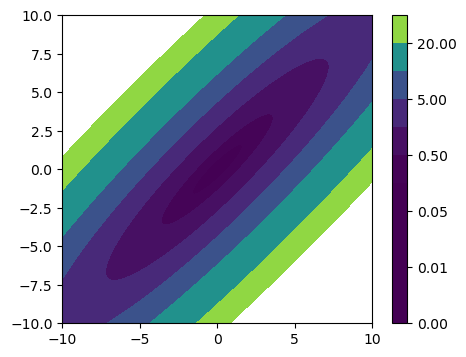

In [49]:
# Matyas function
step = .01
grid_matyas = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_matyas = func_matyas(grid_matyas)
fig_matyas, ax_matyas = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_matyas = ax_matyas.contourf(grid_matyas[0], grid_matyas[1], fv_matyas, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 30])
fig_matyas.colorbar(contour_matyas, ax=ax_matyas)

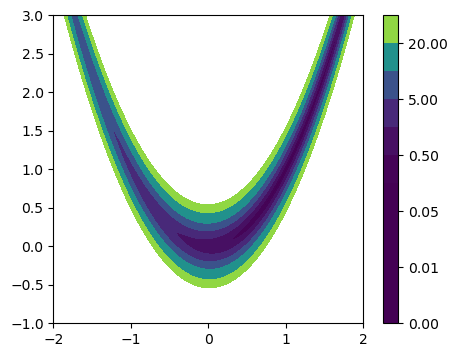

In [50]:
# Rosenbrock function
step = .01
grid_rosenbrock = np.meshgrid(np.arange(-2, 2+step, step), np.arange(-1, 3+step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)
fig_rosenbrock, ax_rosenbrock = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 30])
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

### 4-1. Test code (x0 -> x1 만 수행)

In [69]:
### Check gradient of x0(by Finite Difference Method)
def grad_central_diff(f, x):
    rel_step = 1e-6
    dfdx = np.zeros(len(x))
    for i in range(len(x)):
        h = rel_step*np.max([np.abs(x[i]), 1])
        unitvector = np.zeros(len(x)); unitvector[i] = 1
        dx = h*unitvector
        num = f(x+dx) - f(x-dx)
        den = 2*h
        dfdx[i] = num/den
    if not np.isfinite(dfdx).all(): # Check finitude
        raise ValueError('At least one component of gradient is not finite !')
    return dfdx

In [59]:
def interpol_alpha(alpha_lo, alpha_hi):
    return

In [ ]:
f = lambda x : func_booth(x)
############## Tolerance setting
tol = 1e-4
############## Initial guess x0
x0 = np.array([0, 0]) # 2 x 1 matrix(※ matlab과 다른 점. numpyp는 vector를 1차원 array, matrix를 2차원 array로 엄밀하게 구분해서 다룬다.)
                      # 웬만하면 vector는 1차원 array로, matrix는 2차원 array로 쓰는 걸 추천. GPT가 수치적으로는 그게 안정적이라고 추천함.
### Check finitude of function value of x0
f0 = f(x0)
if not np.isfinite(f0).all():
    raise ValueError('Function value at x0 is not finite. Try another x0 !')
else:
    pass

### Check gradient of x0
grad0 = grad_central_diff(f, x0)
if np.linalg.norm(grad0) < tol: # Check optimality
    print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} < {tol}, x0 : {x0} is optimum point !')
else:
    pass

### Initialization for searching iterations
x_new = x0
f_new = f0
grad_new = grad0

############## Searching iterations
###### Update info of current point
x_cur = x_new
f_cur = f_new
grad_cur = grad_new

###### Line search
### Search direction - by steepest gradient method
p_cur = -grad_cur
if not np.isfinite(p_cur).all():
    raise ValueError('At least one component of search direction p is not finite !')
elif grad_cur@p_cur > 0:
    print(f'Warning : grad(x_k)·p_k={grad_cur@p_cur} > 0 : Search direction p_k would likely make function increase !')
    print(f'Warning : p_k would be replaced with steepest descent direction grad(x0) : {-grad_cur} !')
    p_cur = -grad_central_diff(x_cur)
else:
    pass

### Step length - Strong Wolfe's conditions & Interpolation
# Parameter settings
c1, c2 = 1e-4, .9
alpha_try_old, alpha_try = 0, 1

phi0 = f_cur
dphi0 = grad_cur@p_cur

phi_armijo = lambda alpha : phi0 + c1*alpha*dphi0

while True:
    x_try = x_cur + alpha_try*p_cur
    phi_try = f(x_try)
    dphi_try = grad_central_diff(f, x_try)

    phi_armijo_try = phi_armijo(alpha_try)

    x_try_old = x_cur + alpha_try_old*p_cur
    phi_try_old = f(x_try_old)

    if (phi_try > phi_armijo_try) | (phi_try > phi_try_old): # phi_try가 충분히 크다면 -> alpha_optm이 alpha_try_old와 alpha_try 사이 존재
        alpha_lo, alpha_hi = alpha_try_old, alpha_try
        alpha_optm = interpol_alpha(alpha_lo, alpha_hi) # bracketing 하고 interpolation iteration 돌려서 alpha_optm 뽑아내자
        break

    elif abs(dphi_try) <= -c2*dphi0: # phi_try가 충분히 작고 기울기까지 작다면
        alpha_optm = alpha_try # 그 점이 alph_optm이다
        break

    elif dphi_try >= 0: # phi_try가 충분히 작긴 한데 기울기가 양수라면 더 작은 phi 값을 가지는 alpha_optm이 alpha_try_old와 alpha_try 사이 존재
        alpha_lo, alpha_hi = alpha_try_old, alpha_try
        alpha_optm = interpol_alpha(alpha_lo, alpha_hi) # bracketing 하고 interpolation iteration 돌려서 alpha_optm 뽑아내자
        break

    else: # phi_try가 충분히 작긴 한데 기울기가 음수라면 더 작은 phi 값을 가지는 alpha_optm은 alpha_try보다 뒤의 구간에 존재 -> 구간 업데이트
        alpha_try_old = alpha_try # 다음 구간의 하한 = 현재 구간의 상한
        alpha_try = alpha_try*2 # 다음 구간의 상한 = 현재 구간 상한의 2배

### 4-2. Test code (함수화하지 않고 수행)

In [24]:
# Tolerance setting
tol = 1e-7

# Initial guess
x_cur = np.array([[3], 
                  [-1]]) # 2 x 1 matrix(※ matlab과 다른 점. numpyp는 vector를 1차원 array, matrix를 2차원 array로 엄밀하게 구분해서 다룬다.)
                      # 따라서 웬만하면 그냥 vector도 matrix form으로 쓰는 걸 추천. 나중에 matrix와 vector를 함께 계산할 일이 많기 때문.

print(f'x0 : {x_cur.reshape(2)}')
grad_cur = Dfunc_booth(x_cur)
k = 0

# NC for optimality check of initial guess
if np.linalg.norm(x_cur) < tol:
    print(f'norm of grad at x0 : {np.linalg.norm(grad_cur)} --> x0 is optimum point !')
else:
    print(f'norm of grad at x0 : {np.linalg.norm(grad_cur)} --> x0 is not optimum point. Optimization begins ...')

    ### Line search
    x_new = x_cur
    grad_new = grad_cur
    while np.linalg.norm(grad_new) > tol:
        # Search direction p_cur - by steepest gradient method
        x_cur = x_new
        grad_cur = grad_new
        p_cur = -grad_cur

        # Step length alpha - backtracking
        c1 = 1e-4
        c2 = 0.5

        alpha_try = 1
        x_alpha_try = x_cur + alpha_try*p_cur

        i = 0
        print()
        while func_booth(x_alpha_try) > (func_booth(x_cur) + c1*alpha_try*grad_cur.T@p_cur):
            # print(f'alpha{i}에서의 함수값 : {func_booth(x_alpha_try)}, armigjo값 : {func_booth(x_cur) + c1*alpha_try*grad_cur.T@p_cur}')
            i = i + 1
            alpha_try = c2*alpha_try
            x_alpha_try = x_cur + alpha_try*p_cur
        alpha = alpha_try
        print(f'alpha = alpha_{k}_{i}')

        # New point x_new
        x_new = x_cur + alpha*p_cur
        grad_new = Dfunc_booth(x_new)
        k = k + 1
        print(f'x_{k} = {x_new.reshape(2)} / |grad(x_{k})| = {np.linalg.norm(grad_new)}')

print(f'optimization converges --> x* = {x_new.reshape(2)} / |grad(x*)| = {np.linalg.norm(grad_new)}')


x0 : [ 3 -1]
norm of grad at x0 : 26.832815729997478 --> x0 is not optimum point. Optimization begins ...

alpha = alpha_0_4
x_1 = [3.75 0.5 ] / |grad(x_1)| = 8.077747210701755

alpha = alpha_1_2
x_2 = [1.875 1.25 ] / |grad(x_2)| = 11.739356881873896

alpha = alpha_2_4
x_3 = [2.203125 1.90625 ] / |grad(x_3)| = 3.534014404682018

alpha = alpha_3_2
x_4 = [1.3828125 2.234375 ] / |grad(x_4)| = 5.13596863581983

alpha = alpha_4_4
x_5 = [1.52636719 2.52148438] / |grad(x_5)| = 1.546131302048383

alpha = alpha_5_2
x_6 = [1.16748047 2.66503906] / |grad(x_6)| = 2.2469862781711756

alpha = alpha_6_4
x_7 = [1.23028564 2.79064941] / |grad(x_7)| = 0.6764324446461676

alpha = alpha_7_2
x_8 = [1.07327271 2.85345459] / |grad(x_8)| = 0.9830564966998893

alpha = alpha_8_4
x_9 = [1.10074997 2.90840912] / |grad(x_9)| = 0.2959391945326983

alpha = alpha_9_2
x_10 = [1.03205681 2.93588638] / |grad(x_10)| = 0.43008721730620153

alpha = alpha_10_4
x_11 = [1.04407811 2.95992899] / |grad(x_11)| = 0.12947339760805

### 4-3. Final code ... Main (함수화하여 수행)

In [25]:
######################### Central Difference Method로 함수의 근사 gradient 계산하는 함수
def grad_centraldiff(func, x):
    dim_x = x.shape[0]
    dfdx = np.empty([dim_x, 1])
    h = 1e-6
    for i in np.arange(dim_x):
        dx = np.zeros([dim_x, 1]); dx[i] = 1
        dfdx[i] = (func(x + h*dx) - func(x - h*dx))/(2*h)
    return dfdx

In [26]:
######################### Steepest Descent Method 함수
def stp_descent(func, x):
    p = -grad_centraldiff(func, x)
    return p

In [27]:
######################### Backtracking 함수
# backtracking 알고리즘, 더 포괄적으로 step size alpha를 찾는 line search algorithm은 반드시 함수가 명시적으로 주어져야 한다.
# alpha를 찾기 위해서는 every alpha_try에서 function evaluation을 거쳐야 하기 때문이다.
def backtracking(func, x, grad_x, p, k):
    c1 = 1e-4
    c2 = 0.5

    alpha_try = 1
    x_try = x + alpha_try*p

    i = 0
    while func(x_try) > (func(x) + c1*alpha_try*grad_x.T@p):
        i = i + 1
        alpha_try = c2*alpha_try
        x_try = x + alpha_try*p
    alpha = alpha_try
    print(f'alpha_{k}_{i} = {alpha}\n')
    return alpha

In [28]:
#################################### Define optimization problem  ####################################
obj = func_rosenbrock

#################################### Tolerance setting ####################################
tol = 1e-7

#################################### Initial guess ####################################
x_cur = np.array([[0], 
                  [3]]) # 2 x 1 matrix(※ matlab과 다른 점. numpyp는 vector를 1차원 array, matrix를 2차원 array로 엄밀하게 구분해서 다룬다.)
                      # 따라서 웬만하면 그냥 vector도 matrix form으로 쓰는 걸 추천. 나중에 matrix와 vector를 함께 계산할 일이 많기 때문.
dim_x = x_cur.shape[0]

print(f'x0 : {x_cur.reshape(dim_x)}') # 이렇게 메시지 출력할 때만 vector form으로 쓰자(메시지는 알아보기 쉬워야 하니까).
grad_cur = grad_centraldiff(obj, x_cur)
k = 0

#################################### NC for optimality check of initial guess ####################################
if np.linalg.norm(grad_cur) < tol:
    print(f'norm of grad at x0 : {np.linalg.norm(grad_cur)} --> x0 is optimum point !')
else:
    print(f'norm of grad at x0 : {np.linalg.norm(grad_cur)} --> x0 is not optimum point. Optimization begins ...')

    #################################### Line search ####################################
    x_new = x_cur
    grad_new = grad_cur
    while np.linalg.norm(grad_new) > tol: #### Convergence Check ####
        #################################### Search direction p_cur ####################################
        x_cur = x_new
        grad_cur = grad_new
        p_cur = stp_descent(obj, x_cur) #### Steepest descent method ####
        print(f'p_{k} = {p_cur.reshape(dim_x)}')

        #################################### Step length alpha ####################################
        alpha = backtracking(obj, x_cur, grad_cur, p_cur, k) #### backtracking algorithm ####

        # New point x_new
        x_new = x_cur + alpha*p_cur
        grad_new = grad_centraldiff(obj, x_new)
        k = k + 1
        print(f'x_{k} = {x_new.reshape(dim_x)} / |grad(x_{k})| = {np.linalg.norm(grad_new)}')

#################################### Complete Optimization ####################################
print(f'optimization converges --> x* = {x_new.reshape(dim_x)} / |grad(x*)| = {np.linalg.norm(grad_new)}')


x0 : [0 3]
norm of grad at x0 : 600.0033334008182 --> x0 is not optimum point. Optimization begins ...
p_0 = [   1.99999999 -600.00000008]
alpha_0_7 = 0.0078125

x_1 = [ 0.015625 -1.6875  ] / |grad(x_1)| = 337.6578472911628
p_1 = [ -8.57965088 337.54882821]
alpha_1_7 = 0.0078125

x_2 = [-0.05140352  0.94960022] / |grad(x_2)| = 190.18626971567335
p_2 = [ -17.36798161 -189.39157955]
alpha_2_7 = 0.0078125

x_3 = [-0.18709088 -0.5300215 ] / |grad(x_3)| = 121.50923200836293
p_3 = [ 44.65855331 113.00489848]
alpha_3_4 = 0.0625

x_4 = [2.6040687  6.53278466] / |grad(x_4)| = 266.6063238216408
p_4 = [-261.93710146   49.67782988]
alpha_4_12 = 0.000244140625

x_5 = [2.54011922 6.54491304] / |grad(x_5)| = 92.98232806774064
p_5 = [ 91.11490979 -18.54148177]
alpha_5_12 = 0.000244140625

x_6 = [2.56236407 6.54038631] / |grad(x_6)| = 29.517481754285573
p_6 = [-29.0797343    5.06466011]
alpha_6_12 = 0.000244140625

x_7 = [2.55526452 6.5416228 ] / |grad(x_7)| = 9.719835156383375
p_7 = [ 9.4061998  -2.44